In [ ]:
# Step 1: Clone the Dataset Repository
!git clone https://github.com/chauhanarpit09/Face-Mask-Detection-.git

Cloning into 'Face-Mask-Detection-'...
remote: Enumerating objects: 4547, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 4547 (delta 11), reused 0 (delta 0), pack-reused 4523 (from 1)
Receiving objects: 100% (4547/4547), 176.67 MiB | 17.06 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (4678/4678), done.


In [ ]:
# train_dir = "/content/Face-Mask-Detection-/facemask/train"
# val_dir = "/content/Face-Mask-Detection-/facemask/valid"
# test_dir = "/content/Face-Mask-Detection-/facemask/test"

data_dir = '/content/Face-Mask-Detection-/facemask/'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'valid')


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
# Import preprocess_input from the specific application module (e.g., vgg16)
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    # horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Step 3: Build the VGG16-based Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model.output)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(0.7)(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Set Up Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Step 5: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)



Found 4296 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


135/135 ━━━━━━━━━━━━━━━━━━━━ 67s 461ms/step - accuracy: 0.6192 - loss: 0.6397 - val_accuracy: 0.9400 - val_loss: 0.2473 - learning_rate: 1.0000e-04
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 61s 433ms/step - accuracy: 0.7873 - loss: 0.4065 - val_accuracy: 0.9600 - val_loss: 0.1457 - learning_rate: 1.0000e-04
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 425ms/step - accuracy: 0.8433 - loss: 0.3438 - val_accuracy: 0.9767 - val_loss: 0.0828 - learning_rate: 1.0000e-04
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 442ms/step - accuracy: 0.8849 - loss: 0.2870 - val_accuracy: 0.9700 - val_loss: 0.0909 - learning_rate: 1.0000e-04
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 60s 428ms/step - accuracy: 0.8764 - loss: 0.2880 - val_accuracy: 0.9800 - val_loss: 0.0647 - learning_rate: 1.0000e-04
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 437ms/step - accuracy: 0.9011 - loss: 0.2427 - val_accuracy: 0.9800 - val_loss: 0.0568 - learning_rate: 1.0000e-04
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 60s 426ms/step - 

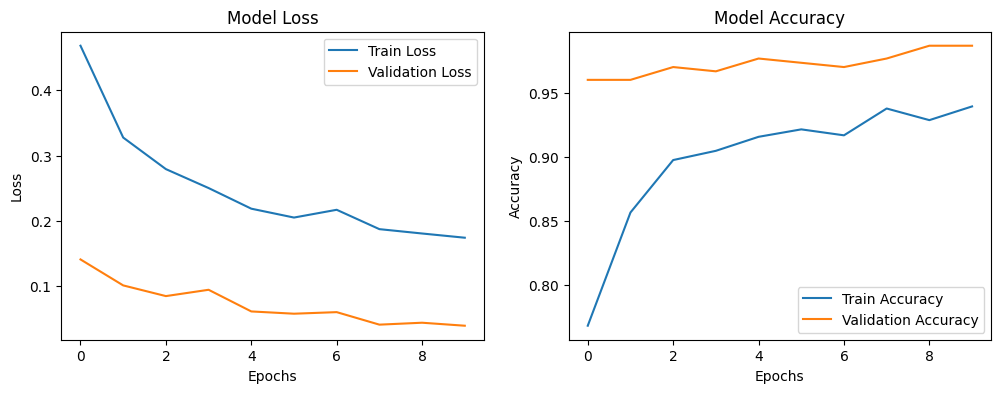

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9889 - loss: 0.0403
Validation Loss: 0.0391
Validation Accuracy: 0.9867
Found 74 images belonging to 2 classes.
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Classification Report:
              precision    recall  f1-score   support

   with_mask       0.65      0.80      0.71        44
without_mask       0.55      0.37      0.44        30

    accuracy                           0.62        74
   macro avg       0.60      0.58      0.58        74
weighted avg       0.61      0.62      0.60        74


Confusion Matrix:
[[35  9]
 [19 11]]


In [ ]:
# Step 6: Evaluate the Model
def plot_metrics(history):
    # Plot loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_metrics(history)

# Evaluate on validation data
eval_loss, eval_accuracy = model.evaluate(val_generator) #val_generator
print(f"Validation Loss: {eval_loss:.4f}")
print(f"Validation Accuracy: {eval_accuracy:.4f}")

# Step 7: Classification Report and Confusion Matrix
def evaluate_model(model, generator):
    predictions = model.predict(generator)
    y_pred = (predictions > 0.8).astype(int)
    y_true = generator.classes
    # Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

test_dir = os.path.join(data_dir, 'test')
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
evaluate_model(model, test_generator)


In [ ]:
# Step 8: Test with an Image URL
def test_image(image_url, model, classes):
    import requests
    from PIL import Image

    # Download and preprocess the image
    response = requests.get(image_url, stream=True)
    img = Image.open(response.raw).resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    class_label = classes[int(prediction[0] > 0.5)]
    print(prediction)
    print(f'Predicted Class: {class_label}')

# Example usage
classes = ['with_mask', 'without_mask']
image_url = input("Enter an image URL: ")
test_image(image_url, model, classes)


Enter an image URL: https://na.cx/i/eqzQJYw.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00257366]]
Predicted Class: with_mask


<ipython-input-19-2bdee59c0f5a>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_label = classes[int(prediction[0] > 0.5)]
